In [1]:
import proplot as pplt
import healsparse
import numpy as np
import fitsio

In [2]:
hsp_map = healsparse.HealSparseMap.read("DES0007-5957_metadetect-v3_mdetcat_range0000-0009-healsparse-mask.hs")

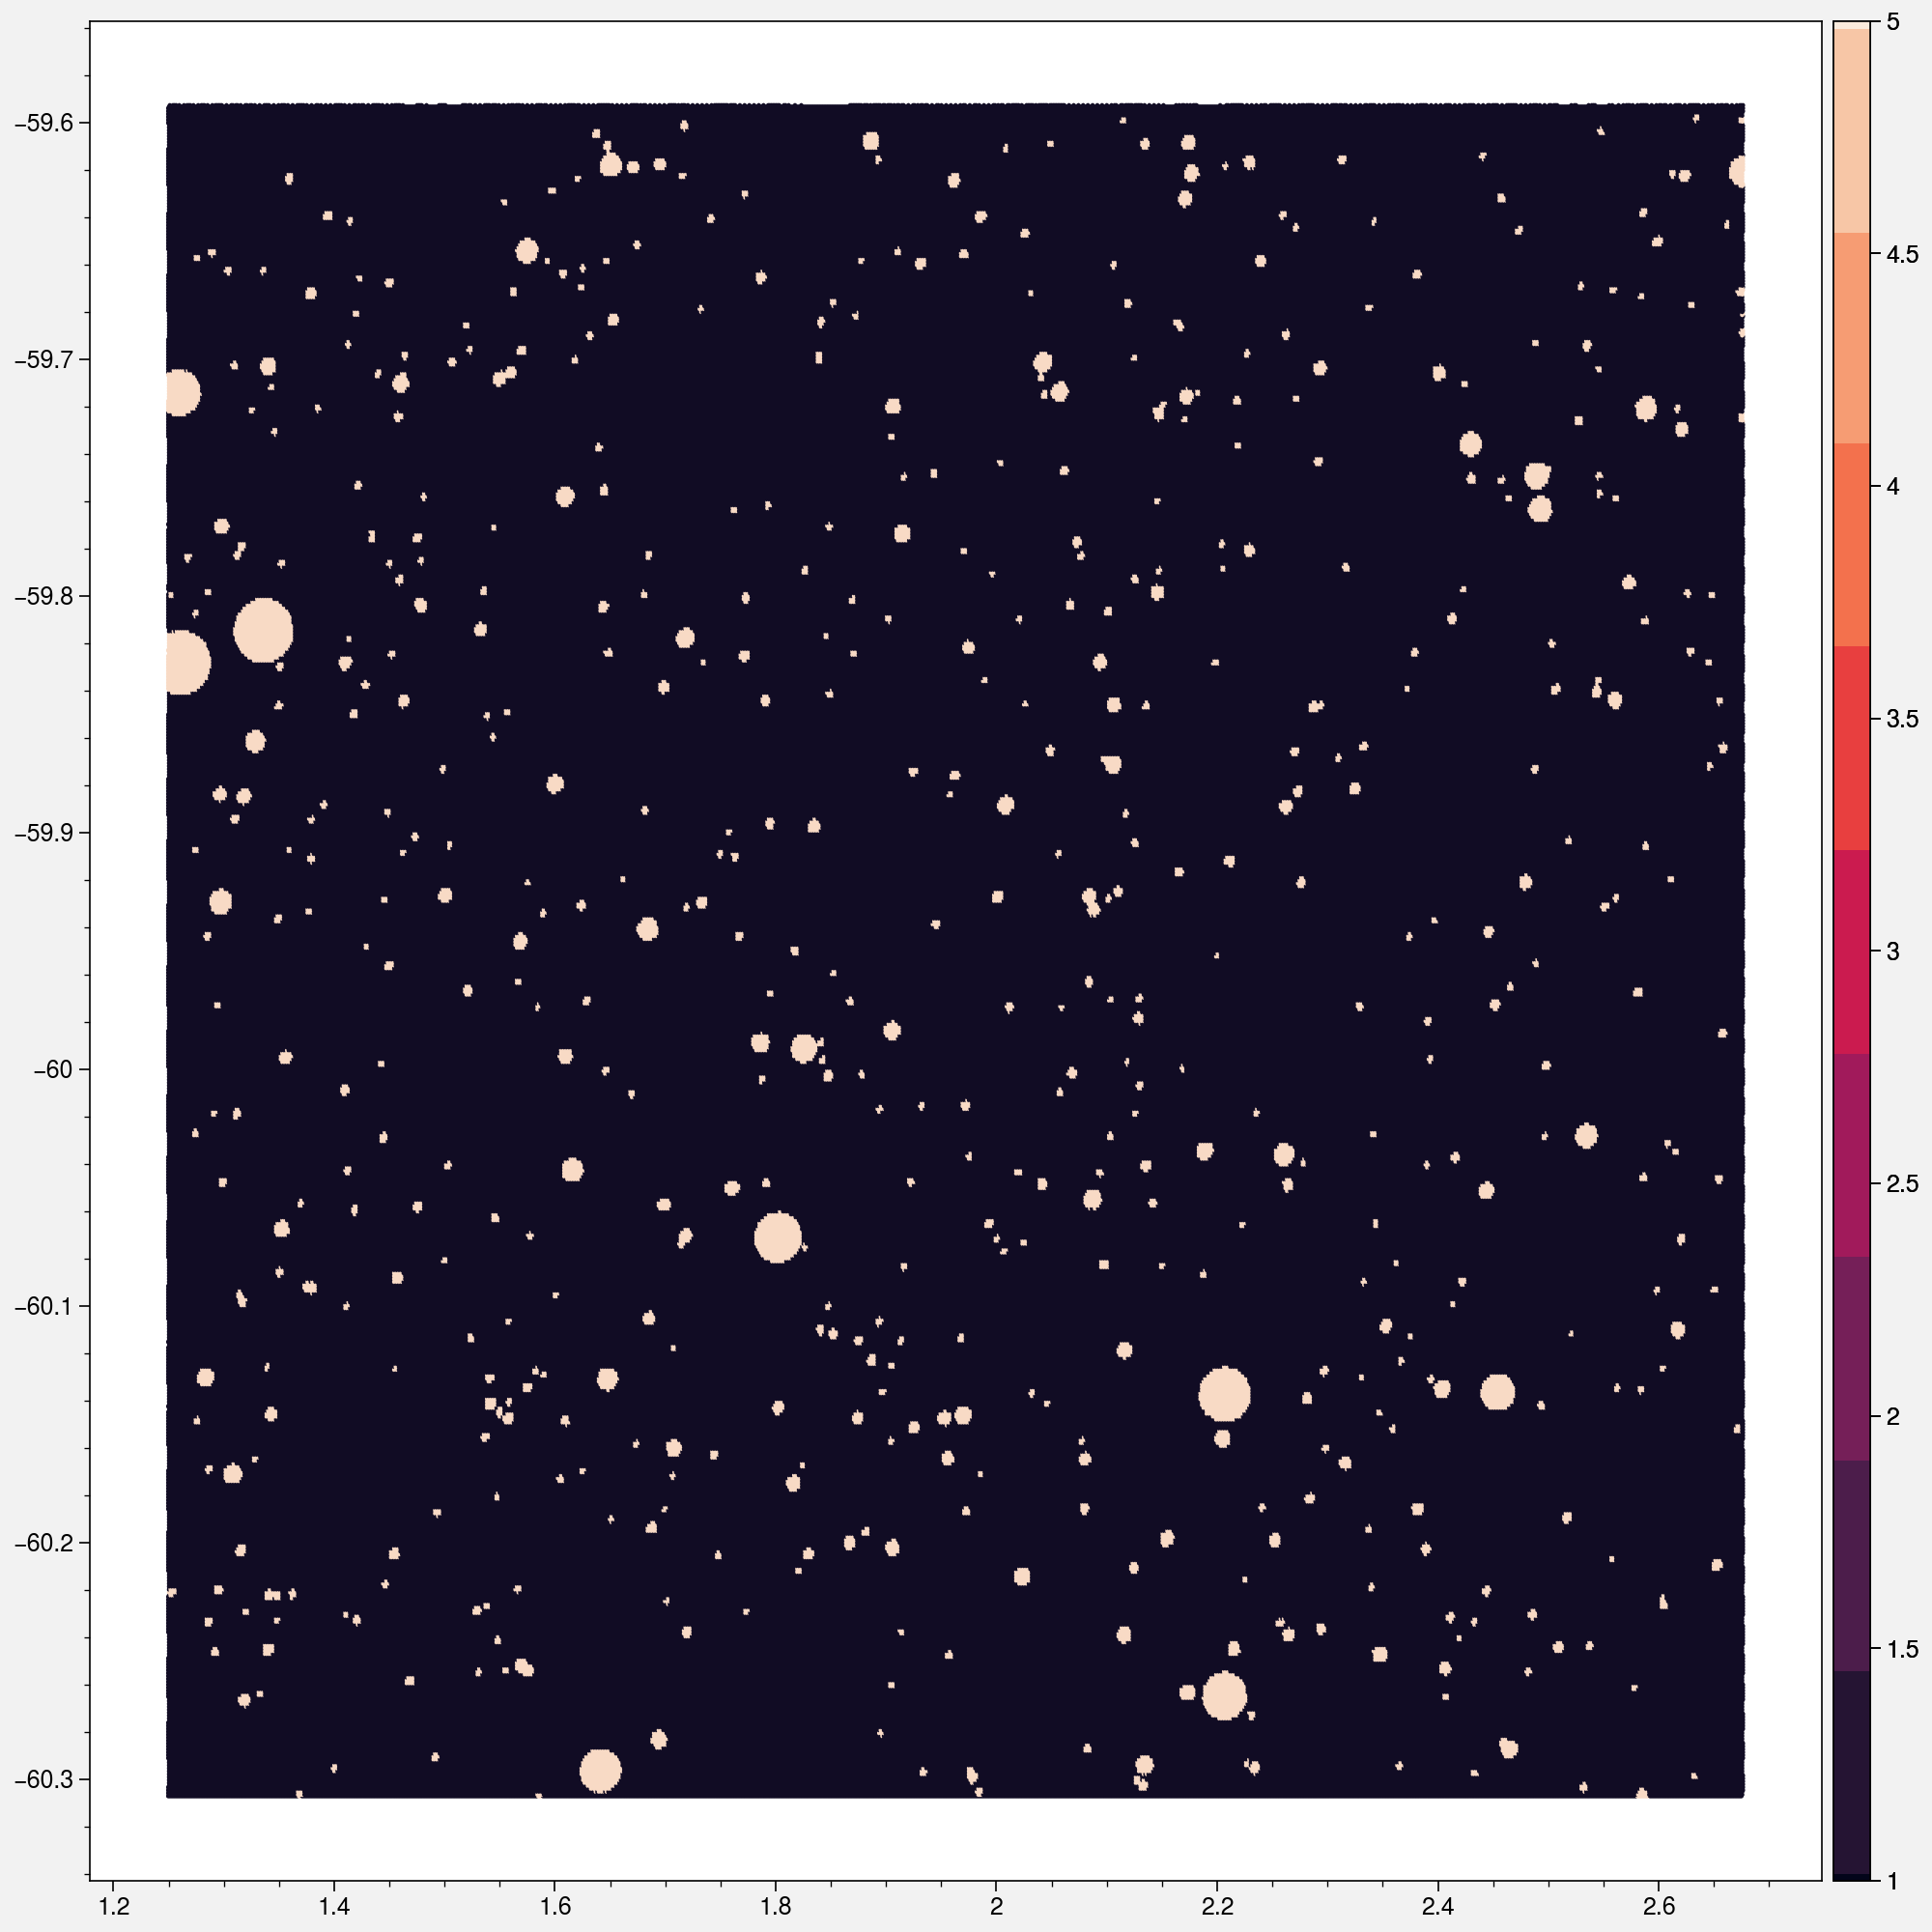

In [3]:
fig, axs = pplt.subplots(figsize=(10, 10))

vpix, ra, dec = hsp_map.valid_pixels_pos(return_pixels=True)

axs.hexbin(
    ra, dec, C=hsp_map[vpix], 
    gridsize=1000, 
    # extent=[1.8, 2.2, -60.2, -60.24], 
    reduce_C_function=np.max,
    vmin=0, vmax=4,
    # levels=[0, 1, 2, 3, 4, 5],
    colorbar='r',
    cmap='rocket',
)
axs.grid(False)
axs.invert_xaxis()
# axs.hexbin(ra, dec, gridsize=100, colorbar='r', extent=[1.8, 2.2, -60.2, -60.24])

In [7]:
import fitsio

d = fitsio.read("DES0007-5957_metadetect-v3_mdetcat_range0000-0009.fits.fz", ext="msk")

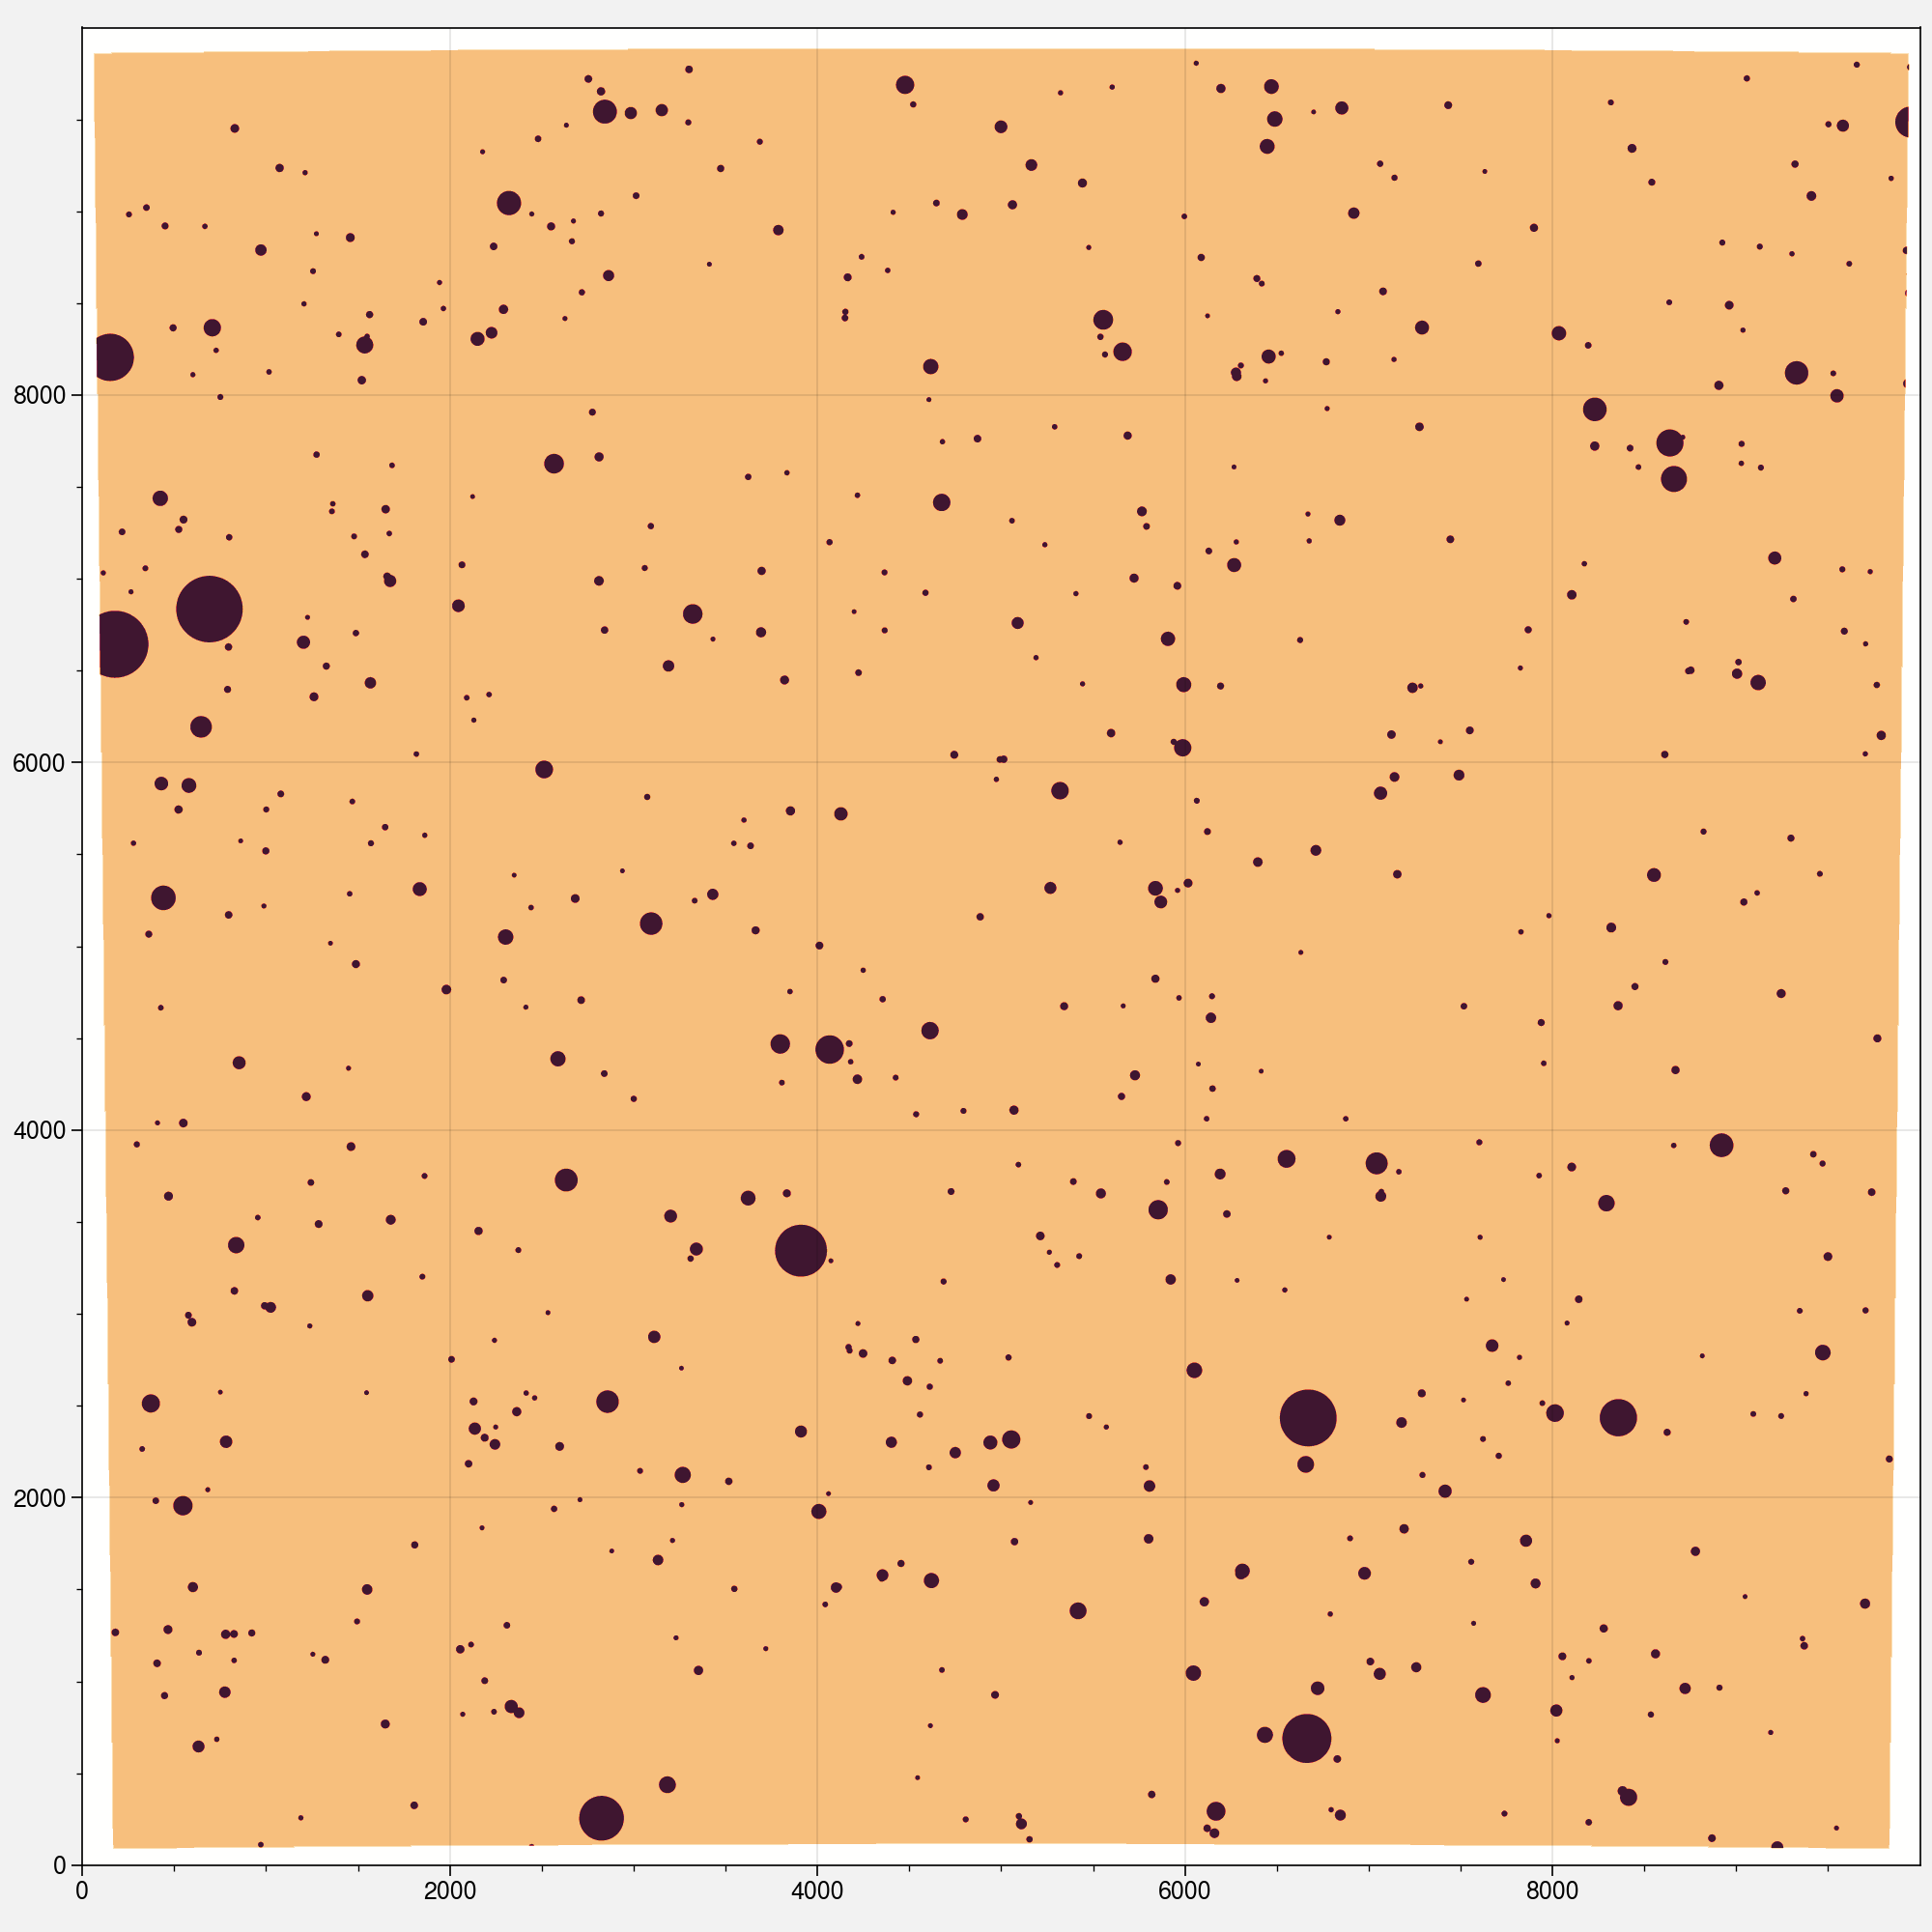

In [21]:
fig, axs = pplt.subplots(figsize=(10, 10))
axs.imshow(d[:, ::-1], origin='lower')

In [10]:
ii = fitsio.read("DES0007-5957_r5227p01_z_pizza-cutter-slices.fits.fz", ext="image_info")

In [12]:
import json
from esutil.wcsutil import WCS

wcs = WCS(json.loads(ii["wcs"][0]))

In [19]:
print(wcs.image2sky(np.array([10]), np.array([0]))[0] - wcs.image2sky(np.array([0]), np.array([0]))[0])
print(wcs.image2sky(np.array([0]), np.array([10]))[1] - wcs.image2sky(np.array([0]), np.array([0]))[1])

[-0.00147492]
[0.00073047]


In [20]:
axs.imshow?

In [22]:
wcs


{'attnum': 1,
 'author': 'unknown',
 'band': 'z',
 'bitpix': 8,
 'bunit': 'COUNTS/S',
 'cd1_1': -7.305555555556e-05,
 'cd1_2': 0.0,
 'cd2_1': 0.0,
 'cd2_2': 7.305555555556e-05,
 'centert1': 'MANUAL',
 'centert2': 'MANUAL',
 'checksum': 'DfGWFcGTDcGTDcGT',
 'combinet': 'WEIGHTED',
 'comment': '  FITS (Flexible Image Transport System) format is defined in '
            "'Astronomy",
 'crossra0': 'N',
 'crpix1': 5000.5,
 'crpix2': 5000.5,
 'crval1': 1.963033,
 'crval2': -59.95,
 'ctype1': 'RA---TAN',
 'ctype2': 'DEC--TAN',
 'cunit1': 'deg',
 'cunit2': 'deg',
 'datasum': '2113593433',
 'date': '2019-06-27T23:10:07',
 'dec_cent': -59.9500365277576,
 'decc1': -60.3131942869849,
 'decc2': -60.3131942869849,
 'decc3': -59.5827808682601,
 'decc4': -59.5827808682601,
 'deccmax': -59.5827808682601,
 'deccmin': -60.3131942869849,
 'des_ext': 'IMAGE',
 'desfname': 'DES0007-5957_r4907p01_z.fits',
 'equinox': 2000.0,
 'eupsprod': 'MEPipeline',
 'eupsver': 'Y6A1+1',
 'exptime': 1170.0,
 'extname': 'SC